<a href="https://colab.research.google.com/github/pfa-2023/Test-Repo/blob/main/GalaxyClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"salmaborcheni","key":"d9a2fd97f5159e7b8247a102884b4e94"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6637        253  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2389         63  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2476         50  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [7]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

100% 1.77G/1.77G [00:15<00:00, 153MB/s]
100% 1.77G/1.77G [00:15<00:00, 121MB/s]


In [8]:
!unzip galaxy-zoo-the-galaxy-challenge

Archive:  galaxy-zoo-the-galaxy-challenge.zip
  inflating: all_ones_benchmark.zip  
  inflating: all_zeros_benchmark.zip  
  inflating: central_pixel_benchmark.zip  
  inflating: images_test_rev1.zip    
  inflating: images_training_rev1.zip  
  inflating: training_solutions_rev1.zip  


In [9]:
# Import NumPy and Pandas libraries
import numpy as np 
import pandas as pd 

# Import the OS library
import os

# Walk through the /kaggle/input directory and print the names of all files
# found in this directory and its subdirectories
for dirname, _, filenames in os.walk('/content/'):
    # Loop through the filenames in the current directory
    for filename in filenames:
        # Print the full path to the file
        print(os.path.join(dirname, filename))


/content/galaxy-zoo-the-galaxy-challenge.zip
/content/kaggle.json
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/logs/2023.04.13/13.28.53.665788.log
/content/.config/logs/2023.04.13/13.30.17.294219.log
/content/.config/logs/2023.04.13/13.29.19.483680.log
/content/.config/logs/2023.04.13/13.29.51.584180.log
/content/.config/logs/2023.04.13/13.30.16.508499.log
/content/.config/logs/2023.04.13/13.29.43.381288.log
/content/.config/configurations/config_default
/content/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip
/content/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
/content/galaxy-zoo-the-galaxy-challenge/central_pixel_benchmark.zip
/content/galaxy-zoo-the-galaxy-challenge/all_zeros_benchmark.zip
/content/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip
/content/galaxy-zoo-the-gala

In [10]:
# Import the necessary libraries
import zipfile

# Define a function to unzip a file to a given destination folder
def unzip(file, destination):
    # Print a message indicating that the file is being unzipped
    print('Unzipping to', destination)
    # Use the zipfile module to extract the contents of the zip file to the destination folder
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall(destination)

# Define the base directory for the data
base_dir = "/content/tmp"
# Define the paths to the training and testing images
train_images_path = os.path.join(base_dir, "images_training_rev1")
test_images_path = os.path.join(base_dir, "images_test_rev1")

# If the base directory does not exist, unzip the necessary files
if not os.path.exists(base_dir):
    unzip('/content/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip', base_dir)
    unzip('/content/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip', base_dir)
    unzip('/content/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip', base_dir)

# Loop through the files in the base directory and print the paths of the first 5 files
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames[:5]:
        print(os.path.join(dirname, filename))


Unzipping to /content/tmp
Unzipping to /content/tmp
Unzipping to /content/tmp
/content/tmp/training_solutions_rev1.csv
/content/tmp/images_training_rev1/212399.jpg
/content/tmp/images_training_rev1/904151.jpg
/content/tmp/images_training_rev1/388258.jpg
/content/tmp/images_training_rev1/542390.jpg
/content/tmp/images_training_rev1/838792.jpg
/content/tmp/images_test_rev1/441546.jpg
/content/tmp/images_test_rev1/150453.jpg
/content/tmp/images_test_rev1/787148.jpg
/content/tmp/images_test_rev1/749497.jpg
/content/tmp/images_test_rev1/946738.jpg


In [12]:
import pandas as pd

def append_ext(filename):
    # Appends `.jpg` file extension to a filename 
    return f"{filename}.jpg"

train_sol = pd.read_csv("/content/tmp/training_solutions_rev1.csv")
train_sol["GalaxyID"] = train_sol["GalaxyID"].apply(append_ext)
train_sol.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create an ImageDataGenerator object and set the rescale factor to 1/255 and validation split to 0.2
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# create a train generator that will read images from the train_images_path directory
# using the galaxy IDs from train_sol DataFrame, and labels from "Class1.1", "Class1.2", and "Class1.3" columns
# the generator will use a batch size of 32, shuffle the data, and return the raw labels
train_generator = datagen.flow_from_dataframe(
    dataframe=train_sol,
    directory=train_images_path,
    x_col="GalaxyID",
    y_col=["Class1.1", "Class1.2", "Class1.3"],
    clases=['Early type', 'Spiral', 'Artifact'],
    subset="training",
    batch_size=32,
    shuffle=False,
    class_mode="raw",
    target_size=(224,224)
)

# create a validation generator that will read images from the train_images_path directory
# using the galaxy IDs from train_sol DataFrame, and labels from "Class1.1", "Class1.2", and "Class1.3" columns
# the generator will use a batch size of 32, shuffle the data, and return the raw labels
valid_generator = datagen.flow_from_dataframe(
    dataframe=train_sol,
    directory=train_images_path,
    x_col="GalaxyID",
    y_col=["Class1.1", "Class1.2", "Class1.3"],
    subset="validation",
    batch_size=32,
    shuffle=False,
    class_mode="raw",
    target_size=(224,224)
)

# calculate the number of steps per epoch for the train and validation generators
train_steps = np.ceil(train_generator.samples / train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples / valid_generator.batch_size)


Found 49263 validated image filenames.
Found 12315 validated image filenames.


In [14]:
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

def build_model(num_classes):
    
    # Load the VGG19 pre-trained model with imagenet weights and exclude the top layer
    pre_trained_model = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False) 

    # Flatten the output layer to 1 dimension
    x = layers.Flatten()(pre_trained_model.output)

    # Add a fully connected layer with 1024 hidden units and ReLU activation function (x2)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dense(1024, activation='relu')(x)

    # Add a dropout layer with a dropout rate of 0.2 to reduce overfitting
    x = layers.Dropout(0.2)(x)

    # Add a final softmax layer for classification with the number of classes as the output size
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Define the model with the pre-trained VGG19 model as input and the final softmax layer as output
    model = Model(pre_trained_model.input, output)

    # Return the model and pre-trained VGG19 model
    return model, pre_trained_model

# Call the build_model function with the number of classes as 3
model, pre_trained_model = build_model(3)

# Print the summary of the model
print(model.summary())

# Set all layers in the pre-trained model to be non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Print the summary of the model again
print(model.summary())


80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [15]:
# Importing the Adam optimizer from tensorflow.keras.optimizers and the Keras backend module as K
from tensorflow.keras.optimizers import Adam
from keras import backend as K

# Defining a custom loss function called root_mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Configuring the learning process for the model using the compile() method
model.compile(
    # Setting the loss function to be categorical crossentropy
    loss='categorical_crossentropy',
    # Specifying the optimizer to be Adam with a learning rate of 1e-3
    optimizer=Adam(learning_rate=1e-3),
    # Specifying the metric to be accuracy
    metrics=['accuracy']
)


In [16]:
# Importing the pyplot module from matplotlib and aliasing it as plt
from matplotlib import pyplot as plt

# Defining a function to plot the training and validation history of a model
def plot_history(history):
    # Retrieving the accuracy and validation accuracy values for each epoch from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieving the training and validation loss values for each epoch from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Creating a list of epochs based on the number of accuracy values in the history object
    epochs = range(len(acc))

    # Plotting the training and validation accuracy by epoch
    plt.figure(dpi=150)
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.ylabel('Accuracy')
    plt.ylim([0,1])
    plt.legend(('training', 'validation'))

    # Plotting the training and validation loss by epoch
    plt.figure(dpi=150)
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.ylabel('Loss')
    plt.title('Training and validation loss')


In [17]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.6-py3-none-any.whl size=143237 sha256=3e391600c28e6e2de0f75cd42f5f4

2023/04/15 10:12:02 INFO mlflow.tracking.fluent: Experiment with name 'VGG19' does not exist. Creating a new experiment.
2023/04/15 10:12:02 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Epoch 1/10
1540/1540 - 348s - loss: 0.7767 - accuracy: 0.7321 - val_loss: 0.6873 - val_accuracy: 0.7916 - 348s/epoch - 226ms/step
Epoch 2/10
1540/1540 - 344s - loss: 0.6879 - accuracy: 0.7830 - val_loss: 0.6816 - val_accuracy: 0.7957 - 344s/epoch - 223ms/step
Epoch 3/10
1540/1540 - 325s - loss: 0.6810 - accuracy: 0.7949 - val_loss: 0.6769 - val_accuracy: 0.8028 - 325s/epoch - 211ms/step
Epoch 4/10
1540/1540 - 326s - loss: 0.6803 - accuracy: 0.7922 - val_loss: 0.6833 - val_accuracy: 0.7875 - 326s/epoch - 212ms/step
Epoch 5/10
1540/1540 - 325s - loss: 0.6764 - accuracy: 0.8005 - val_loss: 0.6743 - val_accuracy: 0.8054 - 325s/epoch - 211ms/step
Epoch 6/10
1540/1540 - 325s - loss: 0.6741 - accuracy: 0.8033 - val_loss: 0.7196 - val_accuracy: 0.7443 - 325s/epoch - 211ms/step
Epoch 7/10
1540/1540 - 324s - loss: 0.6718 - accuracy: 0.8057 - val_loss: 0.7056 - val_accuracy: 0.7649 - 324s/epoch - 211ms/step
Epoch 8/10
1540/1540 - 324s - loss: 0.6704 - accuracy: 0.8096 - val_loss: 0.6721 - val_acc

2023/04/15 11:10:43 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/04/15 11:10:43 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/04/15 11:10:57 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.7+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


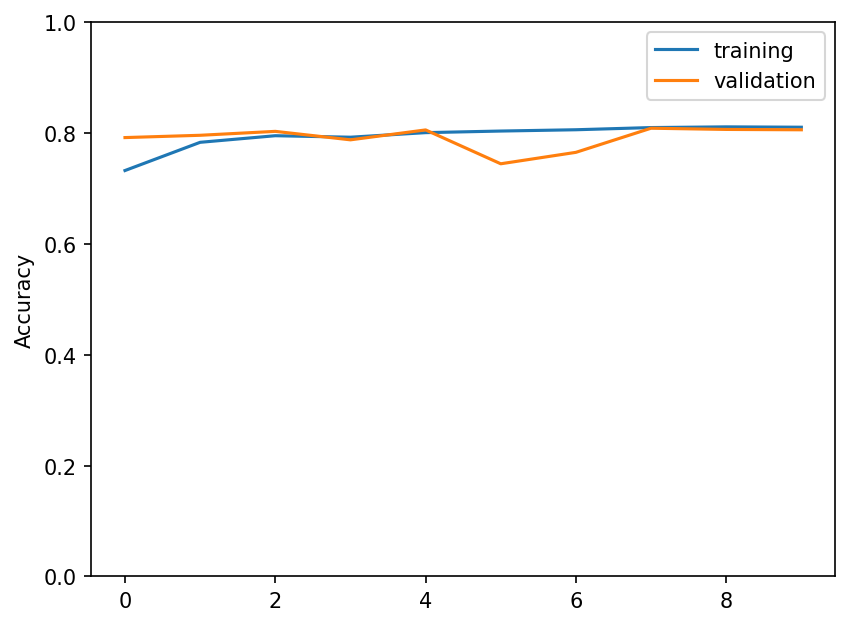

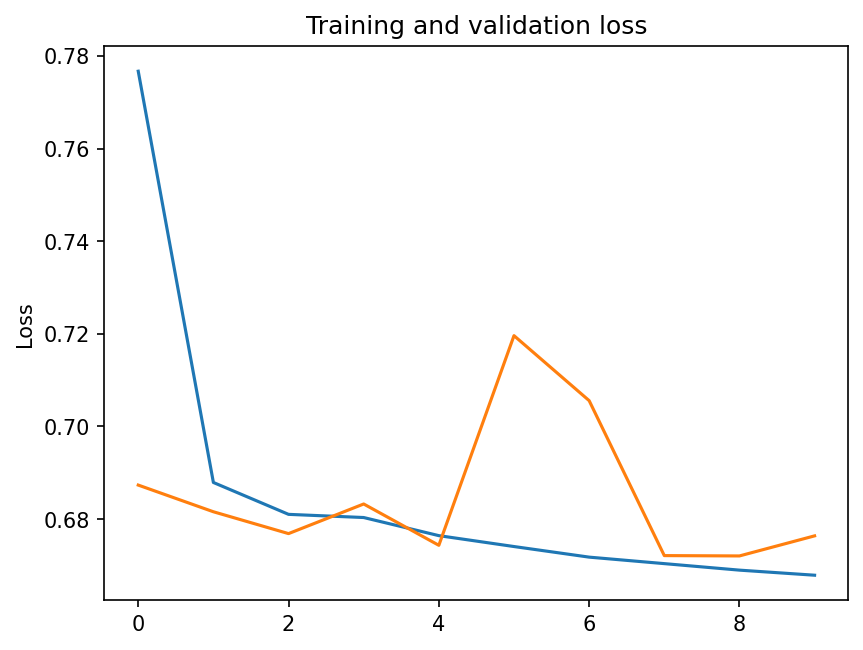

In [18]:
# Using the fit() method of the model to train on the training generator for a specified number of epochs
# and validating on the validation generator at the end of each epoch
import mlflow 
import mlflow.tensorflow
mlflow.set_experiment("VGG19")
mlflow.tensorflow.autolog()
mlflow.end_run()
mlflow.start_run(run_name="VGG19 pretrained")
tf_history = model.fit(train_generator,
                       steps_per_epoch=train_steps,
                       epochs=10,
                       validation_data=valid_generator,
                       validation_steps=val_steps,
                       verbose=2)

# Plotting the training and validation accuracy and loss over time
plot_history(tf_history)


Epoch 1/5
1540/1540 - 374s - loss: 0.7111 - accuracy: 0.7587 - val_loss: 0.6590 - val_accuracy: 0.8277 - 374s/epoch - 243ms/step
Epoch 2/5
1540/1540 - 366s - loss: 0.6551 - accuracy: 0.8367 - val_loss: 0.6560 - val_accuracy: 0.8345 - 366s/epoch - 238ms/step
Epoch 3/5
1540/1540 - 366s - loss: 0.6505 - accuracy: 0.8409 - val_loss: 0.6514 - val_accuracy: 0.8355 - 366s/epoch - 238ms/step
Epoch 4/5
1540/1540 - 366s - loss: 0.6467 - accuracy: 0.8448 - val_loss: 0.6593 - val_accuracy: 0.8201 - 366s/epoch - 237ms/step
Epoch 5/5
1540/1540 - 366s - loss: 0.6433 - accuracy: 0.8465 - val_loss: 0.6480 - val_accuracy: 0.8407 - 366s/epoch - 238ms/step


2023/04/15 11:50:57 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/04/15 11:50:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/04/15 11:51:09 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.7+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


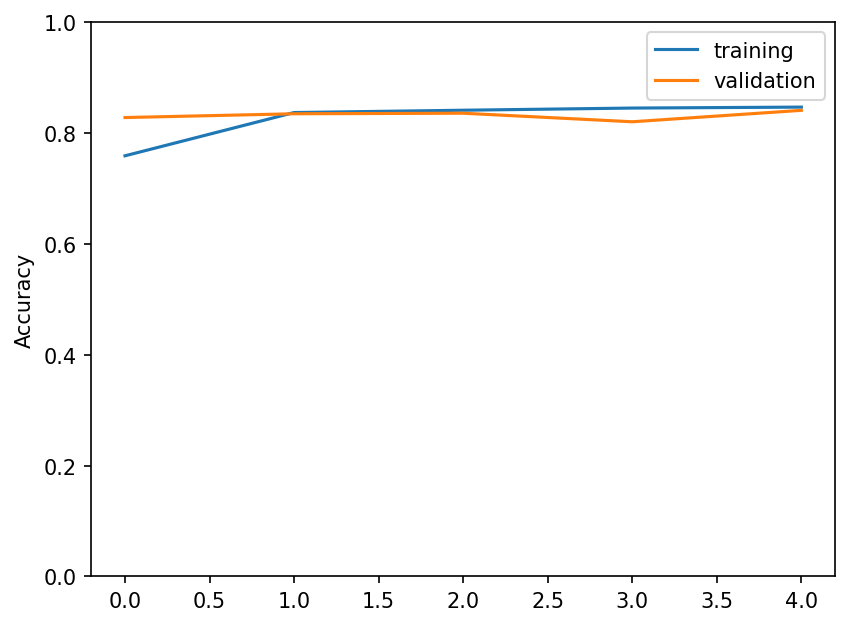

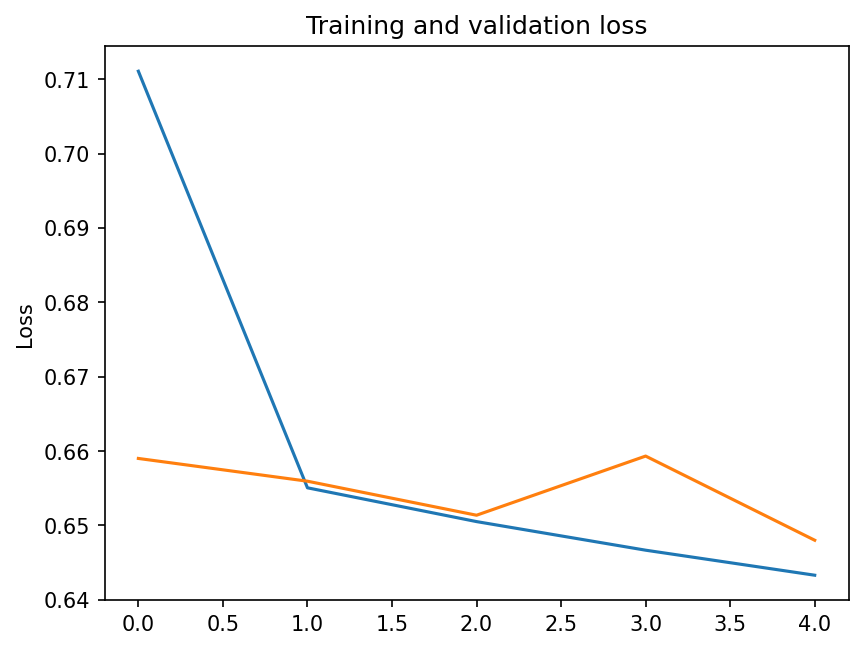

In [24]:
# Make the last 5 layers of the pre-trained model trainable
for layer in pre_trained_model.layers[-5:]:
    layer.trainable = True

# Compile the model with a categorical crossentropy loss function,
# an Adam optimizer with a learning rate of 1e-4, and accuracy metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

# Fit the model to the training and validation data for 5 epochs
# using the generators to generate batches of data
mlflow.end_run()
mlflow.start_run(run_name="VGG19 customized")
tf_history = model.fit(train_generator,
                       steps_per_epoch=train_steps,
                       epochs=5,
                       validation_data=valid_generator,
                       validation_steps=val_steps,
                       verbose=2)

# Plot the training and validation accuracy and loss over time
plot_history(tf_history)





In [20]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=615957dea393dbe306aed290ba8586f5e9f43882fc7a1d30d8b097db0e89bdf0
  Stored in directory: /root/.cache/pip/wheels/31/49/9c/44b13823eb256a3b4dff34b972f7a3c7d9910bfef269e59bd7
Successfully built pyngrok


In [25]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2OScGD84pB7dz5Y2nJSqbVkDB4X_2ojfAH3bMRqh2Lnscump1" 
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://2ef4-34-83-50-48.ngrok-free.app


In [26]:
!mlflow ui

[2023-04-15 11:51:28 +0000] [27413] [INFO] Starting gunicorn 20.1.0
[2023-04-15 11:51:28 +0000] [27413] [INFO] Listening at: http://127.0.0.1:5000 (27413)
[2023-04-15 11:51:28 +0000] [27413] [INFO] Using worker: sync
[2023-04-15 11:51:28 +0000] [27418] [INFO] Booting worker with pid: 27418
[2023-04-15 11:51:28 +0000] [27419] [INFO] Booting worker with pid: 27419
[2023-04-15 11:51:28 +0000] [27420] [INFO] Booting worker with pid: 27420
[2023-04-15 11:51:28 +0000] [27421] [INFO] Booting worker with pid: 27421
[2023-04-15 11:53:17 +0000] [27413] [INFO] Handling signal: int

Aborted!
[2023-04-15 11:53:17 +0000] [27418] [INFO] Worker exiting (pid: 27418)
[2023-04-15 11:53:17 +0000] [27420] [INFO] Worker exiting (pid: 27420)
[2023-04-15 11:53:17 +0000] [27421] [INFO] Worker exiting (pid: 27421)
[2023-04-15 11:53:18 +0000] [27413] [INFO] Shutting down: Master


In [27]:
for layer_idx, layer in enumerate(model.layers):
  #checks the convolutional layer
  if not 'convolutional' in str(layer.__class__):
    continue
  print(layer_idx, layer.name, layer.output.shape)
#creating a model to visualize the training
visualization_model = Model(model.input, model.layers[1].output)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_conv4 (None, 56, 56, 256)
12 block4_conv1 (None, 28, 28, 512)
13 block4_conv2 (None, 28, 28, 512)
14 block4_conv3 (None, 28, 28, 512)
15 block4_conv4 (None, 28, 28, 512)
17 block5_conv1 (None, 14, 14, 512)
18 block5_conv2 (None, 14, 14, 512)
19 block5_conv3 (None, 14, 14, 512)
20 block5_conv4 (None, 14, 14, 512)


In [28]:
visualization_model = Model(model.input, model.layers[1].output)

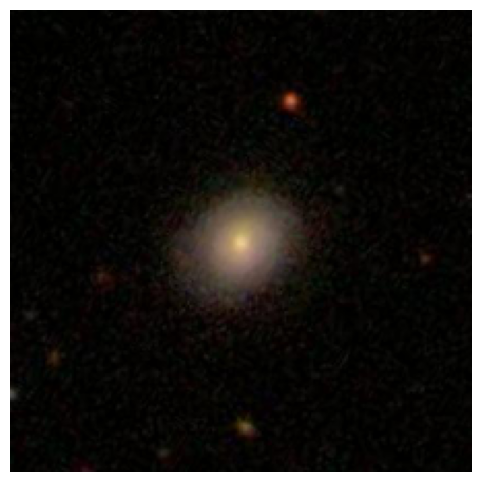

Ground truth:	   [0.383147 0.616853 0.      ]


In [29]:
def show(img):
  '''display image'''
  plt.figure(figsize=(6,6))
  plt.grid(False)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()

next_data = valid_generator.next()
img = next_data[0][0]
show(img)

# expand dimensions so that it fakes a batch containing a single sample
img = np.expand_dims(img, axis=0)

print(f"Ground truth:\t   {next_data[1][0]}")

In [30]:
feature_maps = visualization_model.predict(img)

1/1 [==============================] - 0s 159ms/step


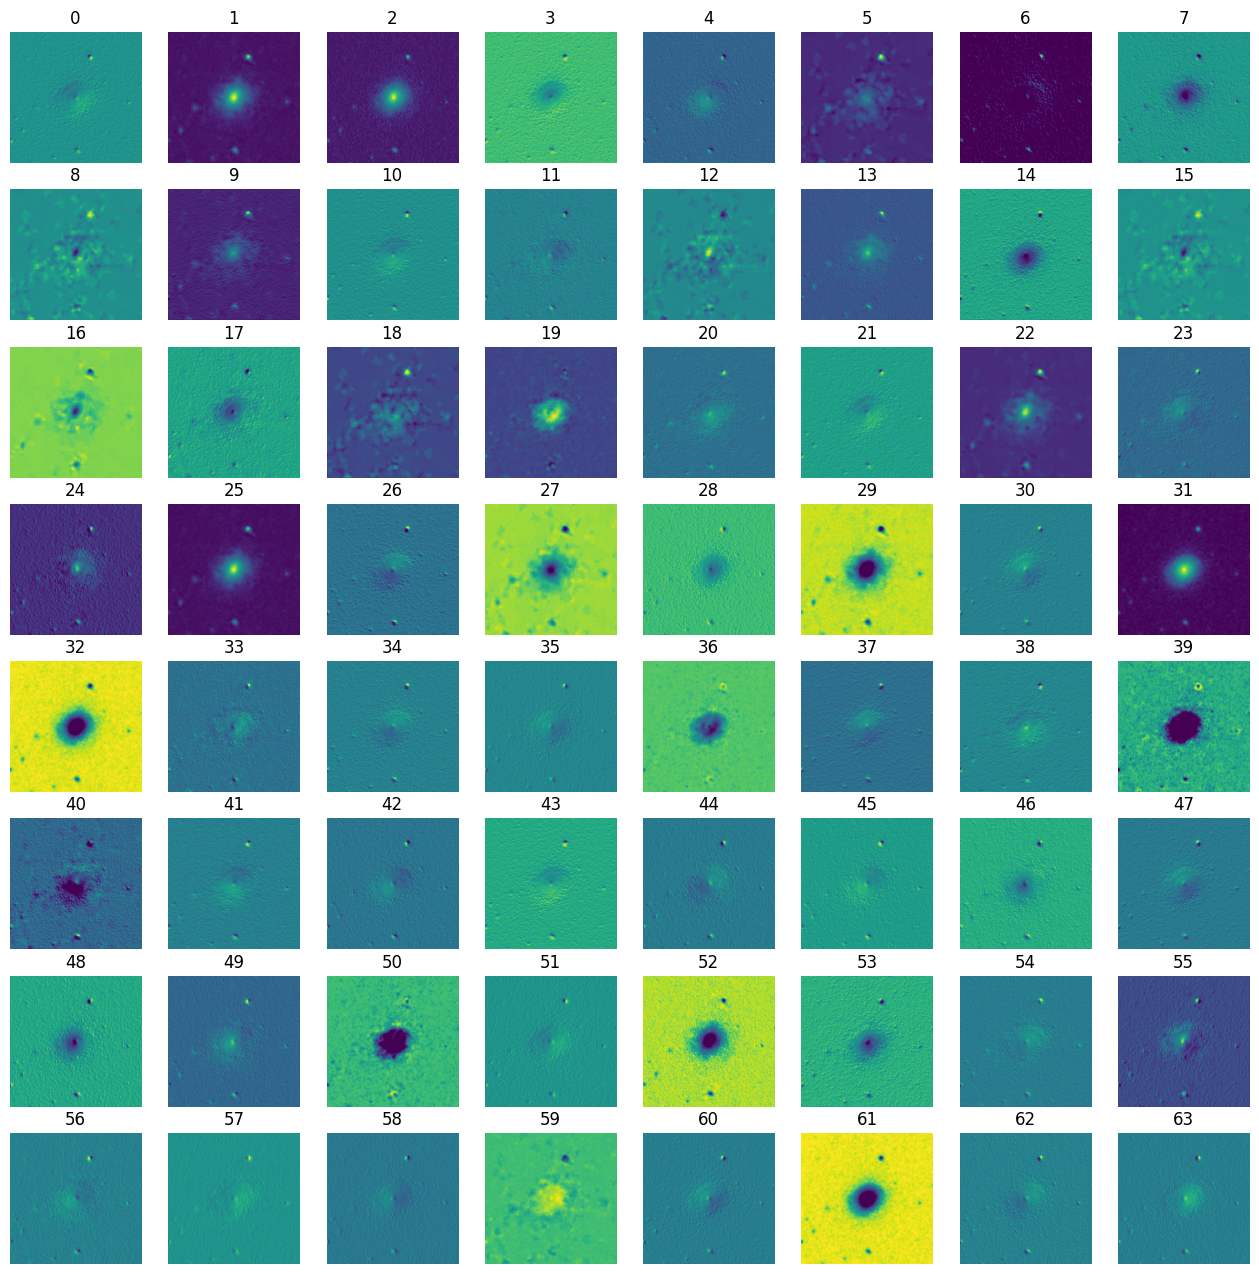

In [31]:
square = 8
fig = plt.gcf()
fig.set_size_inches(square*2,square*2)
idx = 1
for _ in range(square):
  for _ in range(square):
    sp = plt.subplot(square, square, idx)
    sp.axis('Off')
    sp.title.set_text(str(idx-1))
    plt.imshow(feature_maps[0, :, :, idx-1])
    idx += 1

# plt.show()

In [32]:
layer_indices = [1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]
visualization_model = Model( model.input, [model.layers[idx].output for idx in layer_indices] )

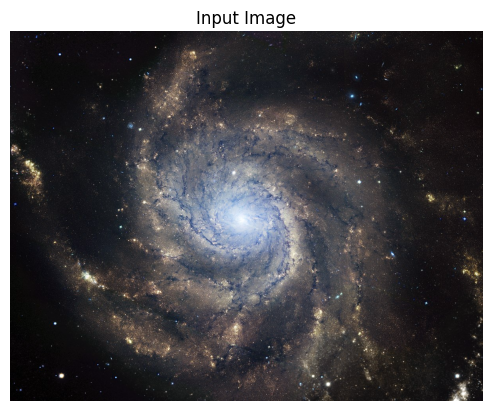

1/1 [==============================] - 0s 27ms/step
Spiral


In [34]:
import tensorflow as tf
import numpy as np
import cv2



# Load the image you want to classify
img = cv2.imread('/content/spiral.jpg')
plt.imshow(img)
plt.axis('Off')
plt.title('Input Image')
plt.show()

# Preprocess the image
img = cv2.resize(img, (224, 224))
img = img.astype("float") / 255.0
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)


# Make predictions on the image
predictions = model.predict(img)

# Print the class of the image
class_index = np.argmax(predictions)

# Print the class name
if class_index == 0:
    print('Early type')
elif class_index == 1:
    print('Spiral')
elif class_index == 2:
    print('Artifact')
else:
    print('Unknown class')

In [36]:
import logging
import mlflow.keras


# Save your Keras model with mlflow
mlflow.keras.save_model(model, "GalaxyClassifierModel")

# Load your Keras model with mlflow
loaded_model = mlflow.keras.load_model("GalaxyClassifierModel")

2023/04/15 12:01:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/04/15 12:01:44 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.7+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
